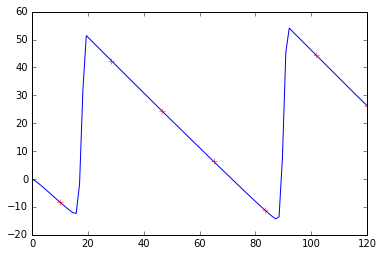

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Example1
from timevarying_covar import time_discretisation_handler

odeModel = Example1.nonlinearFrictionODE()


initCond = [0., 0.5, 0.8]
tt = np.linspace(0., 120, 100)

sol = odeModel.solve(initCond, tt)


evalt = np.linspace(10,120, 7)
tk = np.linspace(0., 120., 25)

model_t = np.sort(np.concatenate((evalt, tk)))

sol2 = odeModel.solve(initCond, model_t)

# Indices of the evaluated points in the augmented time vector
eval_t_ind = [sum(tk < t) + sum(evalt < t) for t in evalt]
tk_ind = [i for i in range(model_t.size) if not i in eval_t_ind]


plt.plot(tt, sol[:,0], '-')
plt.plot(evalt, sol2[eval_t_ind,0], 'r+')
plt.show()

In [22]:
tta, ttm, ttb, Att = time_discretisation_handler(evalt, tk, lambda x: None, 2)

tt_ode_solve = np.sort(np.concatenate(([0.], ttm)))
tk_ind = [i for i in range(tt_ode_solve.size - 1) if not i in eval_t_ind]

sortInds = np.argsort(ttm)
evalt_inds = [np.where(sortInds == i)[0][0] for i in range(evalt.size) ]
tk_inds = [i for i in range(ttm.size) if not i in evalt_inds]

tt_ode = np.concatenate(([0.], ttm[sortInds]))

sol = odeModel.solve(initCond, tt_ode)
At_ = [odeModel.dXdt_Jac(x) for x in sol[1:,:2] ]
Att = [At_[i] for i in evalt_inds] +  [At_[i] for i in tk_inds]

###
# We are now ready to pass (tta, ttm, ttb), Att to the return the covariance function
#
#